In [1]:
cd src

D:\Python\chess\src


In [2]:
import chess
from trainer import Trainer
from chessbot import ChessBot
import numpy as np
from pystockfish import Engine 

trainer = Trainer()
board = chess.Board()
gruefish = ChessBot()
gruefish2 = ChessBot()
stockfish = Engine(depth=20, param={"Threads": 6})
shitfish = Engine(depth=0, param={"Threads": 6})

Using TensorFlow backend.


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
{'dead': False, 'score': 0.7591179, 'move': Move.from_uci('d2d4')}
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
{'dead': False, 'score': 0.57120275, 'move': Move.from_uci('g1f3')}
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
{'dead': False, 'score': 0.52580166, 'move': Move.from_uci('e2e4')}
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
{'dead': False, 'score': 0.37529337, 'move': Move.from_uci('c2c4')}
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
{'dead': False, 'score': 0.34124345, 'move': Move.from_uci('e2e3')}
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
{'dead': False, 'score': 0.38184285163879395, 'move': Move.from_uci('e7e5')}
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
{'dead': False, 'score': 0.34349281, 'move': Move.from_uci('e3e4')}
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
{'dead': False, 'score': 0.5, 'move': Move.from_uci('g8f6')}
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
{'dead': False, 'score': 0.505815535783

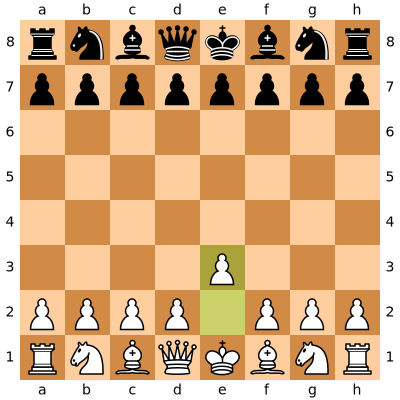

In [3]:
if board.is_game_over():
    print(board.result())
else:
    if board.turn == chess.WHITE:
        #board.push(trainer.best_move(board, filter=True, eval=True))
        board.push(gruefish.best_move(board, eval=True, depth=10, think_time=10))
    else:
        #board.push(trainer.best_move(board, filter=True, eval=True))
        board.push(gruefish2.best_move(board, eval=True, think_time=1))

board

In [ ]:
board.pop()

In [3]:
%%timeit

gruefish.count_pieces(board)

10000 loops, best of 3: 67.5 µs per loop


In [4]:
board.reset()
gruefish.clear_cache()

In [3]:
%%timeit

gruefish.clear_cache()
gruefish.best_move(board, depth=3, think_time=999)

1 loop, best of 3: 37.7 s per loop


In [ ]:
board.fen()

In [ ]:
board.set_fen('R7/5k2/8/2p4p/P1p2P1P/2P5/2K2P2/8 w - - 17 47')
board

In [ ]:
chessbot.best_move(board, eval=True)

In [7]:
while not board.is_game_over():
    if board.turn == chess.WHITE:
        board.push(gruefish.best_move(board, eval=True, depth=10, think_time=5))
        #board.push(trainer.best_move(board, filter=True))
    else:
        #board.push(trainer.best_move(board, filter=True))
        board.push(gruefish2.best_move(board, eval=True, depth=10, think_time=25))
print(board.result(), len(board.move_stack))

0.431043
0.45929068327
0.498435
0.589062
0.57268717885
0.367145299911
0.563709
0.645988643169
0.419889
0.422057449818
0.431992
0.642904073
0.0736368
0.926301
0.0388084
0.981196561828
0.0681550502777
0.961279
0.0533972382545
0.610376
0.189202964306
0.83663
0.608868
0.795602351427
0.454037368298
0.712233364582
0.692466
0.175045847893
0.088924407959
0.286158
0.889238931239
0.199111
0.827572152019
0.035372
0.910537
0.644060760736
0.318803
0.241447
0.93023237586
0.0288705
0.758955
0.0795034170151
0.66199311614
0.292618513107
0.981028
0.0259119272232
0.958588350564
0.0189765
0.984806
0.0155231
0.9632
0.0525366663933
0.938597768545


KeyboardInterrupt: 

In [ ]:
len(board.move_stack)

In [44]:
board.reset()

In [ ]:
print(trainer.test_winrate())

In [ ]:
board, won = trainer.play_vs_sunfish(True)

In [49]:
board, won = trainer.play_vs_stockfish(True, shitfish, think_time=300)

0-1 False 30


In [ ]:
print(won)

In [50]:
temp_board = chess.Board()
move_num = 0

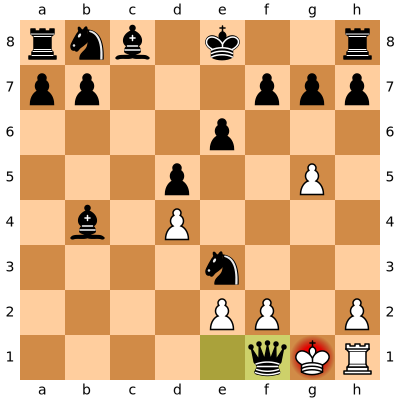

In [81]:
if len(board.move_stack) > move_num:
    temp_board.push(board.move_stack[move_num])
    move_num += 1

temp_board

In [ ]:
#file = open("ficsgamesdb_2016_standard2000_nomovetimes_1435145.pgn")
file = open("ficsgamesdb_2016_chess_nomovetimes_1445486.pgn")

In [ ]:
game = chess.pgn.read_game(file)
board = game.end().board()

In [ ]:
game.headers['Result']

In [ ]:
trainer.train_from_match(board, game.headers['Result'])

In [ ]:
cd src

In [ ]:
from model_conv import model

In [ ]:
board.reset()
board.push(chess.Move.from_uci('c2c4'))
trainer.best_move(board, eval=True)


board.push(chess.Move.from_uci('g8f6'))
print(board)

In [ ]:
batch_x = np.zeros(shape=(1, 8, 8, 12), dtype=np.int8)
batch_x[0] = chessbot.board_to_matrix(board)
model.predict_proba(batch_x)

In [ ]:
stockfish.setfenposition('rnb1k2r/ppq2ppp/4p3/3p4/3P4/2bBPN2/P1P2PPP/3Q1RK1 b kq - 1 11')
stockfish.bestmove()